## Week 5 Workshop: Regression using Non-Parametric Models

In [56]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor



In [57]:
# Sample use case: Classifying Iris flower species using K Nearest Neighbors (KNN)

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Labels: 0 = setosa, 1 = versicolor, 2 = virginica



In [58]:
# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing and 80% for training
# random_state=42 ensures reproducibility of the train/test split by setting a fixed seed for the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)



In [59]:
# Train the classifier
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [60]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


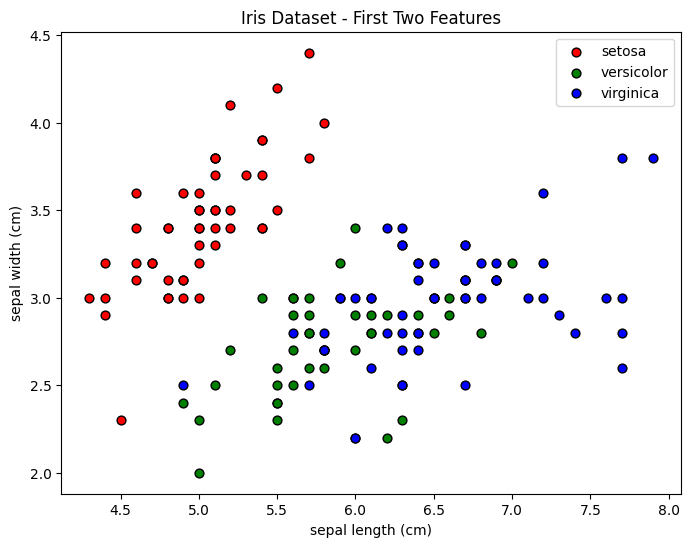

In [61]:
import matplotlib.pyplot as plt

# Use the first two features for visualization
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'green', 'blue'], iris.target_names):
    plt.scatter(X[y == target, 0], X[y == target, 1], c=color, label=label, edgecolor='k', s=40)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset - First Two Features")
plt.legend()
plt.show()

In [62]:
# Predict the species for the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Classifier for Iris Dataset")
sample_idx = 10
print("Sample features:", X_test[sample_idx])
print("True label:", y_test[sample_idx])
print("Predicted label:", y_pred[sample_idx])
#print("Test data sample:", X_test)
#print("Test data predictions:", y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

# Explanation:
# KNN classifies a new data point by looking at the 'k' closest labeled data points in the training set.
# The majority label among these neighbors is assigned to the new point.
# In this example, we use KNN to classify iris flowers based on their features.

KNN Classifier for Iris Dataset
Sample features: [6.5 3.2 5.1 2. ]
True label: 2
Predicted label: 2
Test set accuracy: 1.00


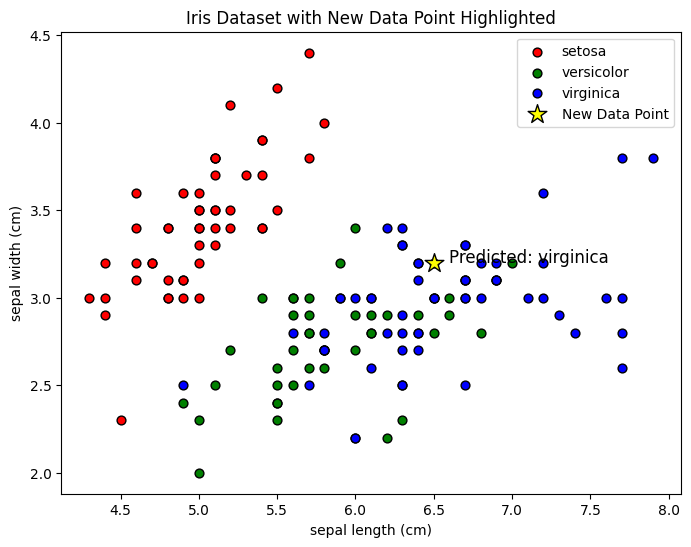

In [63]:
# Visualize the new data point (from X_test[sample_idx]) in the context of the entire dataset
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'green', 'blue'], iris.target_names):
    plt.scatter(X[y == target, 0], X[y == target, 1], c=color, label=label, edgecolor='k', s=40)

# Plot the new data point
plt.scatter(X_test[sample_idx, 0], X_test[sample_idx, 1], 
            c='yellow', edgecolor='black', s=200, marker='*', label='New Data Point')

# Annotate with predicted class
predicted_label = y_pred[sample_idx]
plt.text(X_test[sample_idx, 0]+0.1, X_test[sample_idx, 1], 
         f'Predicted: {iris.target_names[predicted_label]}', fontsize=12, color='black')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset with New Data Point Highlighted")
plt.legend()
plt.show()

## Challenge: Implement a Regression based on Decision Trees

- Use the same data set (Iris)
- Choose your features (one, two, all...)
- Train, test and visualize


In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [65]:
# 1. Choose the regression target and features
# We'll predict petal length (feature index 2) using the other features (sepal length, sepal width, petal width)
y_reg = X[:, 2]  # Petal length
print("Regression target (petal length):", y_reg)
X_reg = X[:, [0, 1, 3]]  # All features except petal length


Regression target (petal length): [1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1]


In [66]:
# 2. Split the data into training and testing sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [67]:

# Create and train the Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor


dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_reg_train, y_reg_train)

# Predict on the test set
y_reg_pred = dt_reg.predict(X_reg_test)

# 5. Evaluate the regression performance
mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"Decision Tree Regression MSE (Petal Length): {mse:.2f}")

Decision Tree Regression MSE (Petal Length): 0.19


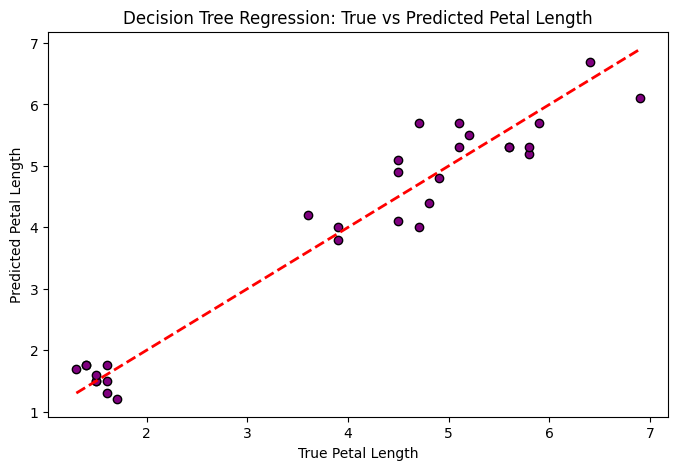

In [68]:
# 6. Visualize: True vs Predicted petal length
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(y_reg_test, y_reg_pred, color='purple', edgecolor='k')
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
plt.xlabel("True Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Decision Tree Regression: True vs Predicted Petal Length")
plt.show()